<a href="https://colab.research.google.com/github/manojkhara/data-science-lab/blob/main/week-3/pytorchANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Training Pipeline
  - Define Model
  - for epoch in range(epochs):
    - Forward pass
    - Loss calculation
    - Backward pass
    - Parameters update
- Model Evaluation
- Improve Training Pipeline using nn.Module and torch.optim
  - Activation Functions(nn.ReLU, nn.Sigmoid,  nn.Softmax)
  - nn.Sequential Container
  - Loss Functions (nn.BCELoss, nn.CrossEntropyLoss etc.)
     
- torch.optim (SGD,ADAM etc)

- Improve training pipeline using torch.utils.data Dataset and DataLoader
  - Data Loading
  - batching
  - shuffling sampling
  - Parallelization (num_workers)


In [ ]:
import torch
from torch import nn
from sklearn.datasets import load_diabetes

from torch import optim

from torch.utils.data import Dataset, DataLoader

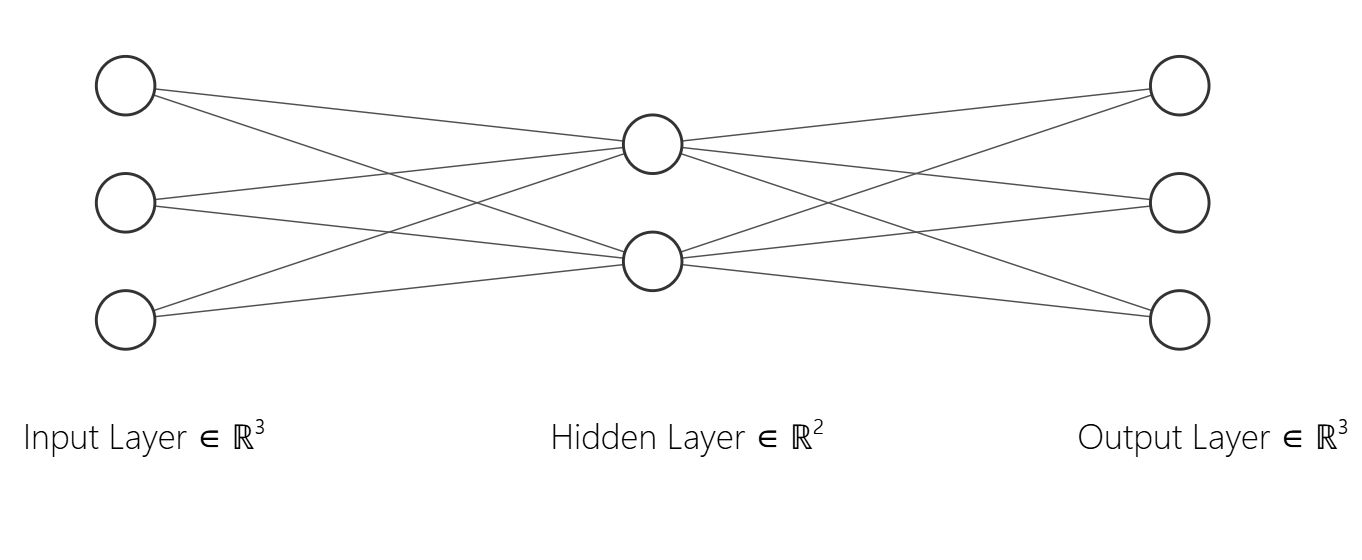

In [ ]:
a1_layer = nn.Linear(in_features= 3, out_features=2) # preactivation
h1_layer = nn.Sigmoid() # activation

In [ ]:
a2_layer = nn.Linear(in_features= 2, out_features=3) # preactivation
h2_layer = nn.Softmax(dim=1) # activation

In [ ]:
network = nn.Sequential(nn.Linear(in_features= 3, out_features=2),
                         nn.Sigmoid(),
                        nn.Linear(in_features= 2, out_features=3),
                        nn.Softmax(dim=1))
network


Sequential(
  (0): Linear(in_features=3, out_features=2, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=2, out_features=3, bias=True)
  (3): Softmax(dim=1)
)

In [ ]:
torch.manual_seed(42)
X = torch.randn(4,3)
X

tensor([[ 0.3367,  0.1288,  0.2345],
        [ 0.2303, -1.1229, -0.1863],
        [ 2.2082, -0.6380,  0.4617],
        [ 0.2674,  0.5349,  0.8094]])

In [ ]:
network.forward(X)

tensor([[0.2952, 0.2121, 0.4927],
        [0.2772, 0.2178, 0.5050],
        [0.2873, 0.2515, 0.4612],
        [0.3054, 0.2065, 0.4882]], grad_fn=<SoftmaxBackward0>)

In [ ]:
print(*network.parameters())

Parameter containing:
tensor([[-0.5367,  0.0189,  0.0133],
        [-0.0725, -0.4260, -0.4458]], requires_grad=True) Parameter containing:
tensor([ 0.1976, -0.2580], requires_grad=True) Parameter containing:
tensor([[ 0.4253, -0.2915],
        [-0.3648,  0.2378],
        [ 0.6337,  0.1885]], requires_grad=True) Parameter containing:
tensor([ 0.0870, -0.0512,  0.3060], requires_grad=True)


In [ ]:
for params in network.parameters():
  print(params)

Parameter containing:
tensor([[-0.5367,  0.0189,  0.0133],
        [-0.0725, -0.4260, -0.4458]], requires_grad=True)
Parameter containing:
tensor([ 0.1976, -0.2580], requires_grad=True)
Parameter containing:
tensor([[ 0.4253, -0.2915],
        [-0.3648,  0.2378],
        [ 0.6337,  0.1885]], requires_grad=True)
Parameter containing:
tensor([ 0.0870, -0.0512,  0.3060], requires_grad=True)


In [ ]:
from torchsummary import summary
summary(network, input_size=(3,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 2]               8
           Sigmoid-2                    [-1, 2]               0
            Linear-3                    [-1, 3]               9
           Softmax-4                    [-1, 3]               0
Total params: 17
Trainable params: 17
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [ ]:
a1 = a1_layer.forward(X)
a1

tensor([[-0.4496, -0.2900],
        [-0.1047, -0.6958],
        [-1.2237, -0.0836],
        [-0.5369, -0.1279]], grad_fn=<AddmmBackward0>)

In [ ]:
h1 = h1_layer.forward(a1)
h1

tensor([[0.3895, 0.4280],
        [0.4738, 0.3327],
        [0.2273, 0.4791],
        [0.3689, 0.4681]], grad_fn=<SigmoidBackward0>)

In [ ]:
a2 = a2_layer.forward(h1)
a2

tensor([[ 0.0386, -0.1262, -0.1017],
        [ 0.0432, -0.1389, -0.0482],
        [ 0.0757, -0.1711, -0.1333],
        [ 0.0317, -0.1143, -0.1238]], grad_fn=<AddmmBackward0>)

In [ ]:
h2 = h2_layer.forward(a2)
h2

tensor([[0.3680, 0.3121, 0.3199],
        [0.3641, 0.3035, 0.3323],
        [0.3857, 0.3013, 0.3130],
        [0.3676, 0.3177, 0.3147]], grad_fn=<SoftmaxBackward0>)

In [ ]:
def softmax(x):
  return torch.exp(x) / torch.sum(torch.exp(x), axis=-1, keepdim=True)

In [ ]:
softmax(a2)

tensor([[0.3680, 0.3121, 0.3199],
        [0.3641, 0.3035, 0.3323],
        [0.3857, 0.3013, 0.3130],
        [0.3676, 0.3177, 0.3147]], grad_fn=<DivBackward0>)

In [ ]:
X, y = load_diabetes(return_X_y=True, as_frame=True)

In [ ]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
y.head()

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
X_train = torch.tensor(X_tr.values, dtype= torch.float32, device= device)
X_test = torch.tensor(X_te.values, dtype= torch.float32, device= device)
y_train = torch.tensor(y_tr.values, dtype= torch.float32, device= device)
y_test = torch.tensor(y_te.values, dtype= torch.float32, device= device)

In [ ]:
X_train

tensor([[ 0.0708,  0.0507,  0.0121,  ...,  0.0343,  0.0274, -0.0011],
        [-0.0091,  0.0507, -0.0181,  ...,  0.0712,  0.0003,  0.0196],
        [ 0.0054, -0.0446,  0.0498,  ..., -0.0026,  0.0170, -0.0135],
        ...,
        [ 0.0308, -0.0446, -0.0202,  ..., -0.0395, -0.0109, -0.0011],
        [-0.0128, -0.0446, -0.0235,  ..., -0.0026, -0.0385, -0.0384],
        [-0.0927, -0.0446,  0.0283,  ..., -0.0395, -0.0051, -0.0011]],
       device='cuda:0')

In [ ]:
X_train

tensor([[ 0.0708,  0.0507,  0.0121,  ...,  0.0343,  0.0274, -0.0011],
        [-0.0091,  0.0507, -0.0181,  ...,  0.0712,  0.0003,  0.0196],
        [ 0.0054, -0.0446,  0.0498,  ..., -0.0026,  0.0170, -0.0135],
        ...,
        [ 0.0308, -0.0446, -0.0202,  ..., -0.0395, -0.0109, -0.0011],
        [-0.0128, -0.0446, -0.0235,  ..., -0.0026, -0.0385, -0.0384],
        [-0.0927, -0.0446,  0.0283,  ..., -0.0395, -0.0051, -0.0011]])

In [ ]:
X_train.shape[1]

10

In [ ]:
a1_layer = nn.Linear(in_features= X_train.shape[1] , out_features=8)
h1_layer = nn.Sigmoid()
a2_layer = nn.Linear(in_features=8, out_features=8)
h2_layer = nn.Sigmoid()

In [ ]:
a1 = a1_layer.forward(X_train)
a1

tensor([[ 0.3426,  0.0776,  0.0932,  ..., -0.1501,  0.0304, -0.3136],
        [ 0.3109,  0.0243,  0.0776,  ..., -0.1472,  0.0022, -0.2639],
        [ 0.3463,  0.1017,  0.1175,  ..., -0.1069,  0.0907, -0.3036],
        ...,
        [ 0.3198,  0.0756,  0.0980,  ..., -0.0765,  0.0844, -0.2897],
        [ 0.3202,  0.0422,  0.0986,  ..., -0.0960,  0.0534, -0.2469],
        [ 0.3014,  0.0656,  0.1323,  ..., -0.0479,  0.0574, -0.2741]],
       grad_fn=<AddmmBackward0>)

In [ ]:
h1 = h1_layer.forward(a1)
h1

tensor([[0.5848, 0.5194, 0.5233,  ..., 0.4625, 0.5076, 0.4222],
        [0.5771, 0.5061, 0.5194,  ..., 0.4633, 0.5006, 0.4344],
        [0.5857, 0.5254, 0.5293,  ..., 0.4733, 0.5226, 0.4247],
        ...,
        [0.5793, 0.5189, 0.5245,  ..., 0.4809, 0.5211, 0.4281],
        [0.5794, 0.5105, 0.5246,  ..., 0.4760, 0.5134, 0.4386],
        [0.5748, 0.5164, 0.5330,  ..., 0.4880, 0.5143, 0.4319]],
       grad_fn=<SigmoidBackward0>)

In [ ]:
a2 = a2_layer.forward(h1)
a2

tensor([[-0.5215, -0.0766, -0.2861,  ...,  0.0357, -0.0974, -0.1406],
        [-0.5183, -0.0653, -0.2851,  ...,  0.0343, -0.1039, -0.1331],
        [-0.5308, -0.0809, -0.2918,  ...,  0.0360, -0.0939, -0.1446],
        ...,
        [-0.5318, -0.0791, -0.2942,  ...,  0.0327, -0.0974, -0.1428],
        [-0.5285, -0.0717, -0.2950,  ...,  0.0339, -0.1015, -0.1393],
        [-0.5311, -0.0744, -0.2992,  ...,  0.0315, -0.0967, -0.1487]],
       grad_fn=<AddmmBackward0>)

In [ ]:
h2 = h2_layer.forward(a2)
h2

tensor([[0.3725, 0.4809, 0.4290,  ..., 0.5089, 0.4757, 0.4649],
        [0.3733, 0.4837, 0.4292,  ..., 0.5086, 0.4741, 0.4668],
        [0.3703, 0.4798, 0.4276,  ..., 0.5090, 0.4765, 0.4639],
        ...,
        [0.3701, 0.4802, 0.4270,  ..., 0.5082, 0.4757, 0.4644],
        [0.3709, 0.4821, 0.4268,  ..., 0.5085, 0.4746, 0.4652],
        [0.3703, 0.4814, 0.4257,  ..., 0.5079, 0.4758, 0.4629]],
       grad_fn=<SigmoidBackward0>)

In [ ]:
model = nn.Sequential(
     nn.Linear(in_features=10, out_features=8),
     nn.Sigmoid(),
     nn.Linear(in_features=8, out_features=8),
     nn.Sigmoid(),
     nn.Linear(in_features=8, out_features=1),
)

model

Sequential(
  (0): Linear(in_features=10, out_features=8, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=8, out_features=8, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=8, out_features=1, bias=True)
)

In [ ]:
y_train

tensor([144., 150., 280., 125.,  59.,  65., 281., 277., 167.,  90.,  72., 178.,
         88., 270., 101., 197.,  97.,  53.,  71., 262.,  52., 102., 166., 189.,
        173., 220., 206.,  97.,  60.,  61., 242., 121., 128., 104., 265., 132.,
        283., 174., 129., 257., 137.,  63.,  93., 232., 208., 261., 179., 258.,
        262.,  51., 237.,  71., 139., 268.,  69., 317., 249., 154., 192., 116.,
         81., 122., 259., 191., 292.,  55., 107., 210.,  91., 253.,  85., 252.,
         59.,  78., 200.,  78., 245., 175.,  42., 127.,  53.,  94., 104., 199.,
        265., 281., 248., 257., 215., 303., 170.,  59., 277., 209., 138., 198.,
        124.,  96., 288., 225., 265., 101.,  55., 198.,  51., 252.,  64., 220.,
        131., 212., 142., 103., 155., 121.,  86., 111.,  65., 131.,  51., 128.,
        141.,  48., 109., 178.,  88.,  84., 216., 150.,  60.,  96., 190.,  74.,
        279., 182., 160., 245., 276., 174., 180., 150., 196., 138.,  97., 246.,
        321., 308., 109.,  69., 182., 25

In [ ]:
y_hat = model.forward(X_train).squeeze()
y_hat

tensor([-0.1268, -0.1265, -0.1282, -0.1283, -0.1281, -0.1283, -0.1279, -0.1271,
        -0.1280, -0.1284, -0.1275, -0.1272, -0.1269, -0.1281, -0.1273, -0.1271,
        -0.1287, -0.1270, -0.1268, -0.1276, -0.1284, -0.1264, -0.1283, -0.1270,
        -0.1277, -0.1268, -0.1277, -0.1280, -0.1274, -0.1287, -0.1280, -0.1284,
        -0.1278, -0.1273, -0.1273, -0.1271, -0.1274, -0.1273, -0.1273, -0.1266,
        -0.1283, -0.1268, -0.1280, -0.1272, -0.1271, -0.1281, -0.1268, -0.1283,
        -0.1267, -0.1277, -0.1285, -0.1276, -0.1265, -0.1264, -0.1281, -0.1269,
        -0.1268, -0.1276, -0.1273, -0.1264, -0.1264, -0.1269, -0.1293, -0.1283,
        -0.1263, -0.1271, -0.1271, -0.1284, -0.1272, -0.1263, -0.1272, -0.1274,
        -0.1279, -0.1274, -0.1277, -0.1275, -0.1270, -0.1286, -0.1279, -0.1277,
        -0.1274, -0.1270, -0.1269, -0.1269, -0.1282, -0.1282, -0.1259, -0.1284,
        -0.1279, -0.1280, -0.1267, -0.1282, -0.1266, -0.1267, -0.1274, -0.1278,
        -0.1265, -0.1276, -0.1284, -0.12

In [ ]:
print(*model.parameters())

Parameter containing:
tensor([[-0.0559, -0.0942,  0.2021,  0.2718, -0.0313, -0.0708,  0.0046, -0.0189,
          0.0760,  0.0886],
        [-0.2872, -0.1167,  0.2663,  0.1232, -0.0157, -0.1907, -0.1935, -0.2833,
         -0.1031,  0.1068],
        [ 0.2016,  0.1460, -0.2795, -0.1902, -0.0499,  0.3059,  0.0457, -0.0819,
          0.1308, -0.1204],
        [-0.2047,  0.2308, -0.1438, -0.0634, -0.3146,  0.2116,  0.2396,  0.1152,
         -0.2205, -0.3121],
        [-0.2568,  0.2358,  0.1518,  0.2661,  0.1657,  0.0800, -0.0031, -0.2405,
         -0.2709, -0.2958],
        [ 0.1295, -0.1553, -0.0636, -0.1820, -0.0576, -0.2226, -0.2066,  0.1049,
         -0.0940,  0.1952],
        [-0.1014, -0.2320, -0.0558, -0.1533, -0.0967, -0.3010,  0.1769, -0.2202,
          0.1589,  0.1435],
        [ 0.2259, -0.2426,  0.2274, -0.1495,  0.1173,  0.2970, -0.0446, -0.0024,
         -0.0728, -0.2640]], requires_grad=True) Parameter containing:
tensor([ 0.1518, -0.3139,  0.1963,  0.2366,  0.2991, -0.0746, -

- Training Pipeline
  - Define Model
  - for epoch in range(epochs):
    - Forward pass
    - Loss calculation
    - Backward pass
    - Parameters update
- Model Evaluation

In [ ]:
model = nn.Sequential(
     nn.Linear(in_features=10, out_features=8),
     nn.Sigmoid(),
     nn.Linear(in_features=8, out_features=8),
     nn.Sigmoid(),
     nn.Linear(in_features=8, out_features=1),
) #class

model.to(device)

loss_func = nn.MSELoss()
epochs= 3
learning_rate = 0.01

for epoch in range(epochs):

  # forward pass
  y_hat= model.forward(X_train)

  # Compute loss

  loss = loss_func(y_hat.squeeze(), y_train)
  print(loss)

  # Backward pass
  loss.backward()

  # Update parameters
  with torch.no_grad():
    for param in model.parameters():
      param -= learning_rate * param.grad # optimizer = sgd , adam, rmsprop

  model.zero_grad() # making gradients zero


tensor(29657.1719, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(26898.1895, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(21850.9570, device='cuda:0', grad_fn=<MseLossBackward0>)


In [ ]:
from torch import nn

In [ ]:

class myModel(nn.Module):
  def __init__(self,in_features,out_features):
    super().__init__()

    self.network = nn.Sequential(
      nn.Linear(in_features=in_features, out_features=8),
      nn.BatchNorm1d(8),
      nn.Sigmoid(),
      nn.Dropout(p=0.3),

      nn.Linear(in_features=8, out_features=8),
      nn.Sigmoid(),
      nn.Linear(in_features=8, out_features=out_features),
      ) #class

  def forward(self,X):
    return self.network(X) #

In [ ]:
model1 = myModel(10,1)
model1.to(device)

myModel(
  (network): Sequential(
    (0): Linear(in_features=10, out_features=8, bias=True)
    (1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Sigmoid()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=8, out_features=8, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=8, out_features=1, bias=True)
  )
)

In [ ]:
from torchsummary import summary
summary(model1, input_size=(10,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 8]              88
       BatchNorm1d-2                    [-1, 8]              16
           Sigmoid-3                    [-1, 8]               0
           Dropout-4                    [-1, 8]               0
            Linear-5                    [-1, 8]              72
           Sigmoid-6                    [-1, 8]               0
            Linear-7                    [-1, 1]               9
Total params: 185
Trainable params: 185
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [ ]:
print(*model1.parameters())

Parameter containing:
tensor([[ 0.2063, -0.0787, -0.2234,  0.0329, -0.0974, -0.3025, -0.0834,  0.1873,
          0.2895, -0.2872],
        [-0.0731,  0.0789,  0.2411, -0.2322, -0.1357, -0.0143, -0.1572,  0.2763,
         -0.1081, -0.0084],
        [ 0.0364, -0.1405, -0.0034, -0.0446, -0.2778,  0.2605,  0.1065,  0.1657,
         -0.1565, -0.1346],
        [ 0.0944,  0.1933, -0.1780,  0.0292,  0.1555,  0.1553,  0.0545,  0.2242,
         -0.2406,  0.1314],
        [ 0.0683, -0.2544,  0.0432, -0.1762, -0.2926,  0.0600, -0.0228, -0.0101,
         -0.1442, -0.0538],
        [ 0.0169, -0.0267,  0.1635,  0.2191, -0.2758,  0.0982,  0.3116,  0.1714,
          0.2843, -0.0888],
        [-0.0741,  0.2874, -0.0180,  0.1483,  0.1154,  0.2485, -0.2716,  0.1821,
         -0.0379,  0.1709],
        [ 0.1974,  0.1815, -0.1033,  0.1058,  0.1667, -0.0939,  0.1933, -0.1139,
          0.2362, -0.0632]], device='cuda:0', requires_grad=True) Parameter containing:
tensor([-0.1940,  0.2471,  0.0743, -0.1250, -0

In [ ]:
model1 = myModel(10,1)
model1.to(device)

loss_func = nn.MSELoss()

# optimizers
optimizer = torch.optim.SGD(model1.parameters(), lr=0.01) # GD

epochs= 3

model1.train() # training phase

for epoch in range(epochs):

  # forward pass
  y_hat= model1(X_train)

  # Compute loss

  loss = loss_func(y_hat.squeeze(), y_train)
  print(loss.item())

  optimizer.zero_grad()

  # Backward pass
  loss.backward()

  # update the weights
  optimizer.step()

29728.98046875
27254.515625
22565.62890625


In [ ]:
# model to evaluation phase

model1.eval() # batchnorm and dropouts will freeze

with torch.no_grad():
  # forward pass
  y_hat= model1(X_test)

  # Compute loss

  loss = loss_func(y_hat.squeeze(), y_test)
  print(loss.item())


14941.1845703125


In [ ]:
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
TensorDataset(X_train,y_train)

In [ ]:
train_loader = DataLoader(TensorDataset(X_train,y_train), batch_size= 33, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test,y_test), batch_size= 33, shuffle=False) # consistency


In [ ]:
for features, labels in train_loader:
  print(features)
  print(labels)
  break

tensor([[ 0.0018,  0.0507,  0.0261, -0.0091,  0.0246,  0.0385, -0.0213,  0.0343,
          0.0094,  0.0031],
        [ 0.0054,  0.0507, -0.0019,  0.0081, -0.0043, -0.0157, -0.0029, -0.0026,
          0.0384, -0.0135],
        [-0.0745, -0.0446, -0.0461, -0.0435, -0.0291, -0.0232,  0.0155, -0.0395,
         -0.0398, -0.0218],
        [ 0.0417,  0.0507, -0.0321, -0.0229, -0.0497, -0.0401,  0.0302, -0.0395,
         -0.1261,  0.0155],
        [ 0.0381,  0.0507,  0.0056,  0.0322,  0.0067,  0.0175, -0.0250,  0.0343,
          0.0148,  0.0611],
        [-0.0927, -0.0446, -0.0407, -0.0194, -0.0690, -0.0793,  0.0413, -0.0764,
         -0.0412, -0.0963],
        [ 0.0344,  0.0507, -0.0094,  0.0597, -0.0360, -0.0076, -0.0765,  0.0712,
          0.0110, -0.0218],
        [-0.0200, -0.0446, -0.0547, -0.0539, -0.0662, -0.0574,  0.0118, -0.0395,
         -0.0741, -0.0052],
        [-0.0055,  0.0507, -0.0084, -0.0022, -0.0332, -0.0636, -0.0360, -0.0026,
          0.0806,  0.0072],
        [ 0.0163, -

# Mini batch gradient descent

In [ ]:
model1 = myModel(10,1)
model1.to(device)

loss_func = nn.MSELoss()

# optimizers
optimizer = torch.optim.SGD(model1.parameters(), lr=0.01) # GD

epochs= 3

model1.train() # training phase

for epoch in range(epochs):
  loss_per_epoch = 0
  # forward pass
  for features, labels in train_loader:
    features = features.to(device)
    labels = labels.to(device)

    y_hat = model1(features)

    loss = loss_func(y_hat.squeeze(), labels)

    loss_per_epoch += loss.item()

    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # update the weights
    optimizer.step()
  print(loss_per_epoch)

156514.27978515625
64164.4521484375
54641.5380859375


In [ ]:
# model to evaluation phase

model1.eval() # batchnorm and dropouts will freeze

with torch.no_grad():
  loss_per_epoch = 0
  # forward pass
  for features, labels in test_loader:
    features = features.to(device)
    labels = labels.to(device)

    y_hat = model1(features)

    loss = loss_func(y_hat.squeeze(), labels)

    loss_per_epoch += loss.item()
  print(loss_per_epoch)


10029.10205078125
